In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [69]:
df = pd.read_csv(r"C:\Users\Pavilion\Documents\Coding Languages\Artificial Intelligence\Excel and Csv\Housing.csv")

In [70]:
df2 = df.copy()
MainRoadLE = LabelEncoder()
GuestroomLE = LabelEncoder()
BasementLE = LabelEncoder()
HotwaterHeatingLE = LabelEncoder()
AirConditioningLE = LabelEncoder()
PrefArea = LabelEncoder()
FurnishingStatus = LabelEncoder()
model = RandomForestRegressor(n_estimators = 50)
linear = LinearRegression()
rd = Ridge()
ls = Lasso()
dtr = DecisionTreeRegressor()
poly = PolynomialFeatures(degree = 3)
scaler = StandardScaler()

In [71]:
df2.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [72]:
df2.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [73]:
df2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [74]:
df2['mainroad'] = MainRoadLE.fit_transform(df2['mainroad'])
df2['guestroom'] = GuestroomLE.fit_transform(df2['guestroom'])
df2['basement'] = BasementLE.fit_transform(df2['basement'])
df2['hotwaterheating'] = BasementLE.fit_transform(df2['hotwaterheating'])
df2['airconditioning'] = AirConditioningLE.fit_transform(df2['airconditioning'])
df2['prefarea'] = PrefArea.fit_transform(df2['prefarea'])
df2['furnishingstatus'] = FurnishingStatus.fit_transform(df2['furnishingstatus'])

<Axes: ylabel='price'>

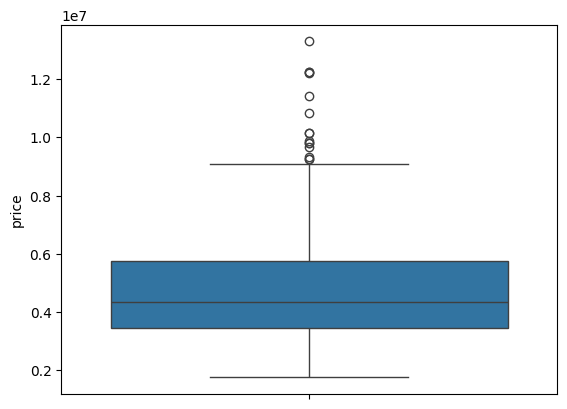

In [75]:
sns.boxplot(df2['price'])

In [76]:
def Outliers(df,columns):
    for i in columns:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upperlimit = q3 + (1.5 * iqr)
        lowerlimit = q1 - (1.5 * iqr)
        df.loc[(df[i] > upperlimit),i] = upperlimit
        df.loc[(df[i] < lowerlimit), i] = lowerlimit
    return df
cols = ['price','area','bedrooms','stories']
df2 = Outliers(df2,cols)

C:\Users\Pavilion\AppData\Local\Temp\ipykernel_16488\3653935886.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[i] > upperlimit),i] = upperlimit
C:\Users\Pavilion\AppData\Local\Temp\ipykernel_16488\3653935886.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[i] > upperlimit),i] = upperlimit


<Axes: >

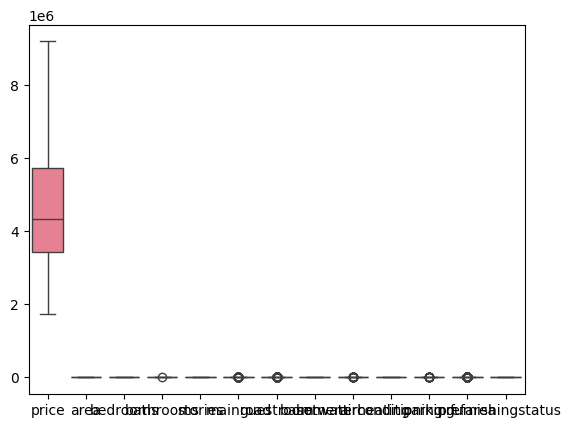

In [77]:
sns.boxplot(df2)

In [78]:
x = df2.drop(columns = 'price')
y = df2['price']

In [79]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 70, test_size = .3)

In [80]:
scaler.fit(xtrain)
xtrainscaled = scaler.transform(xtrain)
xtestscaled = scaler.transform(xtest)

In [81]:
linear.fit(xtrainscaled,ytrain)
linear.score(xtestscaled,ytest)

0.678945330441239

In [82]:
poly.fit(xtrain)
xtrainpoly = poly.transform(xtrain)
xtestpoly = poly.transform(xtest)

In [83]:
linear.fit(xtrainpoly,ytrain)
linear.score(xtestpoly,ytest)

-0.6819946233728094

In [84]:
dtr.fit(xtrainscaled,ytrain)
dtr.score(xtestscaled,ytest)

0.27908207320744993

In [85]:
model.fit(xtrainscaled,ytrain)
model.score(xtestscaled,ytest)

0.683630637222068

In [86]:
rd.fit(xtrainscaled,ytrain)
rd.score(xtestscaled,ytest)

0.6789948786241325